In [16]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


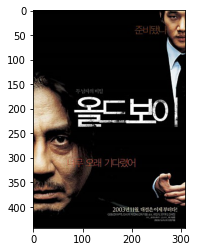

Avg Value
R :  38
G :  32
B :  28


In [17]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image



img = mpimg.imread('/gdrive/My Drive/CD/oldboy.jpg')
plt.imshow(img)
plt.show()

# 2-나
Red = []
Green = []
Blue = []

for x in img:
    for y in x:
        Red.append(y[0])
        Green.append(y[1])
        Blue.append(y[2])

R_max = max(Red)
G_max = max(Green)
B_max = max(Blue)

R_min = min(Red)
G_min = min(Green)
B_min = min(Blue)

R_avg = sum(Red) / len(Red)
G_avg = sum(Green) / len(Green)
B_avg = sum(Blue) / len(Blue)

#print("Max Value")
#print("R : ", R_max)
#print("G : ", G_max)
#print("B : ", B_max)

#print("Min Value")
#print("R : ", R_min)
#print("G : ", G_min)
#print("B : ", B_min)

print("Avg Value")
print("R : ", int(R_avg))
print("G : ", int(G_avg))
print("B : ", int(B_avg))


# 2-다
#for x in img:
#    for y in x:
#        swap = y[0]
#        y[0] = y[2]
#        y[2] = y[1]
#        y[1] = swap

#plt.imshow(img)
#plt.show()

In [18]:
#@test {"output": "ignore"}
print('Installing dependencies...')
!apt-get update -qq && apt-get install -qq libfluidsynth1 fluid-soundfont-gm build-essential libasound2-dev libjack-dev
!pip install -qU pyfluidsynth pretty_midi

!pip install -qU magenta

# Hack to allow python to pick up the newly-installed fluidsynth lib. 
# This is only needed for the hosted Colab environment.
import ctypes.util
orig_ctypes_util_find_library = ctypes.util.find_library
def proxy_find_library(lib):
  if lib == 'fluidsynth':
    return 'libfluidsynth.so.1'
  else:
    return orig_ctypes_util_find_library(lib)
ctypes.util.find_library = proxy_find_library

print('Importing libraries and defining some helper functions...')
from google.colab import files

import magenta
import note_seq
import tensorflow

print('🎉 Done!')
print(magenta.__version__)
print(tensorflow.__version__)

Installing dependencies...
Selecting previously unselected package fluid-soundfont-gm.
(Reading database ... 144786 files and directories currently installed.)
Preparing to unpack .../fluid-soundfont-gm_3.1-5.1_all.deb ...
Unpacking fluid-soundfont-gm (3.1-5.1) ...
Selecting previously unselected package libfluidsynth1:amd64.
Preparing to unpack .../libfluidsynth1_1.1.9-1_amd64.deb ...
Unpacking libfluidsynth1:amd64 (1.1.9-1) ...
Setting up fluid-soundfont-gm (3.1-5.1) ...
Setting up libfluidsynth1:amd64 (1.1.9-1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.2) ...
/sbin/ldconfig.real: /usr/local/lib/python3.6/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link

     |████████████████████████████████| 5.6MB 4.8MB/s 
     |████████████████████████████████| 61kB 6.1MB/s 
     |████████████████████████████████| 1.4MB 4.3MB/s 
     |████████████████████████████████| 358kB 38.9MB/s 
     |████████████████████████████████| 256kB 46.5MB/s 
     |███████████████████████████

In [23]:
from note_seq.protobuf import music_pb2

twinkle_twinkle = music_pb2.NoteSequence()

# Add the notes to the sequence.
twinkle_twinkle.notes.add(pitch=60, start_time=0.0, end_time=0.5, velocity=80)
twinkle_twinkle.notes.add(pitch=60, start_time=0.5, end_time=1.0, velocity=80)
twinkle_twinkle.notes.add(pitch=67, start_time=1.0, end_time=1.5, velocity=80)
twinkle_twinkle.notes.add(pitch=67, start_time=1.5, end_time=2.0, velocity=80)
twinkle_twinkle.notes.add(pitch=69, start_time=2.0, end_time=2.5, velocity=80)
twinkle_twinkle.notes.add(pitch=69, start_time=2.5, end_time=3.0, velocity=80)
twinkle_twinkle.notes.add(pitch=67, start_time=3.0, end_time=4.0, velocity=80)
twinkle_twinkle.notes.add(pitch=65, start_time=4.0, end_time=4.5, velocity=80)
twinkle_twinkle.notes.add(pitch=65, start_time=4.5, end_time=5.0, velocity=80)
twinkle_twinkle.notes.add(pitch=64, start_time=5.0, end_time=5.5, velocity=80)
twinkle_twinkle.notes.add(pitch=64, start_time=5.5, end_time=6.0, velocity=80)
twinkle_twinkle.notes.add(pitch=62, start_time=6.0, end_time=6.5, velocity=80)
twinkle_twinkle.notes.add(pitch=62, start_time=6.5, end_time=7.0, velocity=80)
twinkle_twinkle.notes.add(pitch=60, start_time=7.0, end_time=8.0, velocity=80) 
twinkle_twinkle.total_time = 8

twinkle_twinkle.tempos.add(qpm=60);

# This is a colab utility method that visualizes a NoteSequence.
note_seq.plot_sequence(twinkle_twinkle)

# This is a colab utility method that plays a NoteSequence.
note_seq.play_sequence(twinkle_twinkle,synth=note_seq.fluidsynth)

sen = music_pb2.NoteSequence()
# 도60 도#61 레62 레#63 미64 파65 파#66 솔67 솔#68 라69 라#70 시71 도#72
# Add the notes to the sequence.
sen.notes.add(pitch=int(R_avg), start_time=0.0, end_time=0.25, velocity=80) #파
sen.notes.add(pitch=int(G_avg), start_time=0.25, end_time=0.5, velocity=80) #솔
sen.notes.add(pitch=int(B_avg), start_time=0.5, end_time=0.75, velocity=80) #라

 
sen.total_time = 8

sen.tempos.add(qpm=60);

# This is a colab utility method that visualizes a NoteSequence.
note_seq.plot_sequence(sen)

# This is a colab utility method that plays a NoteSequence.
note_seq.play_sequence(sen,synth=note_seq.fluidsynth)

In [20]:
print('Downloading model bundle. This will take less than a minute...')
note_seq.notebook_utils.download_bundle('basic_rnn.mag', '/content/')

# Import dependencies.
from magenta.models.melody_rnn import melody_rnn_sequence_generator
from magenta.models.shared import sequence_generator_bundle
from note_seq.protobuf import generator_pb2
from note_seq.protobuf import music_pb2

# Initialize the model.
print("Initializing Melody RNN...")
bundle = sequence_generator_bundle.read_bundle_file('/content/basic_rnn.mag')
generator_map = melody_rnn_sequence_generator.get_generator_map()
melody_rnn = generator_map['basic_rnn'](checkpoint=None, bundle=bundle)
melody_rnn.initialize()

print('🎉 Done!')

Initializing Melody RNN...
'model_variables' collection should be of type 'byte_list', but instead is of type 'node_list'.
INFO:tensorflow:Restoring parameters from /tmp/tmprg0_66fy/model.ckpt
🎉 Done!


In [21]:
print('Copying checkpoint from GCS. This will take less than a minute...')
# This will download the mel_2bar_big checkpoint. There are more checkpoints that you
# can use with this model, depending on what kind of output you want
# See the list of checkpoints: https://github.com/magenta/magenta/tree/master/magenta/models/music_vae#pre-trained-checkpoints
!gsutil -q -m cp -R gs://download.magenta.tensorflow.org/models/music_vae/colab2/checkpoints/mel_2bar_big.ckpt.* /content/

# Import dependencies.
from magenta.models.music_vae import configs
from magenta.models.music_vae.trained_model import TrainedModel

# Initialize the model.
print("Initializing Music VAE...")
music_vae = TrainedModel(
      configs.CONFIG_MAP['cat-mel_2bar_big'], 
      batch_size=4, 
      checkpoint_dir_or_path='/content/mel_2bar_big.ckpt')

print('🎉 Done!')


Copying checkpoint from GCS. This will take less than a minute...
Initializing Music VAE...
INFO:tensorflow:Building MusicVAE model with BidirectionalLstmEncoder, CategoricalLstmDecoder, and hparams:
{'max_seq_len': 32, 'z_size': 512, 'free_bits': 0, 'max_beta': 0.5, 'beta_rate': 0.99999, 'batch_size': 4, 'grad_clip': 1.0, 'clip_mode': 'global_norm', 'grad_norm_clip_to_zero': 10000, 'learning_rate': 0.001, 'decay_rate': 0.9999, 'min_learning_rate': 1e-05, 'conditional': True, 'dec_rnn_size': [2048, 2048, 2048], 'enc_rnn_size': [2048], 'dropout_keep_prob': 1.0, 'sampling_schedule': 'inverse_sigmoid', 'sampling_rate': 1000, 'use_cudnn': False, 'residual_encoder': False, 'residual_decoder': False, 'control_preprocessing_rnn_size': [256]}
INFO:tensorflow:
Encoder Cells (bidirectional):
  units: [2048]

Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
INFO:tensorflow:
Decoder Cells:
  units: [2048, 2048, 

In [22]:
# We're going to interpolate between the Twinkle Twinkle Little Star
# NoteSequence we defined in the first section, and one of the generated
# sequences from the previous VAE example

# How many sequences, including the start and end ones, to generate.
num_steps = 8;

# This gives us a list of sequences.
note_sequences = music_vae.interpolate(
      sen,
      twinkle_twinkle, 
      num_steps=num_steps,
      length=32)

# Concatenate them into one long sequence, with the start and 
# end sequences at each end. 
interp_seq = note_seq.sequences_lib.concatenate_sequences(note_sequences)

note_seq.play_sequence(interp_seq, synth=note_seq.fluidsynth)
note_seq.plot_sequence(interp_seq)